# Single Well Assay with 0.1 uM dialyzed p38, Abl GK, and WT Src in non-binding plate; Bos, Bos iso, Erl, Gef

### Plot single wv data

In [1]:
# %load single wavelength data


# get_ipython().run_line_magic('matplotlib', 'inline')
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from matplotlib.offsetbox import AnchoredText
import matplotlib.cm as cm
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter
import matplotlib
from glob import glob


import assaytools


from assaytools import platereader


filenames = ['p38_Abl_WT_GK_Src_WT_GK_conc_0_20190308_112925.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_1_20190308_114040.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_2_20190308_115034.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_3_20190308_120028.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_4_20190308_121025.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_5_20190308_122018.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_6_20190308_123014.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_7_20190308_124006.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_8_20190308_125003.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_9_20190308_125956.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_10_20190308_130948.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_11_20190308_131941.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_12_20190308_132933.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_13_20190308_133926.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_14_20190308_134924.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_15_20190308_135924.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_16_20190308_140921.xml']

datapath = 'infinite_results'


concentrations = np.array([  0.00000000e+00,   8.00000000e-09,   1.34778097e-08,
         2.27064194e-08,   3.82541000e-08,   6.44476851e-08,
         1.08576705e-07,   1.82922021e-07,   3.08173524e-07,
         5.19188015e-07,   8.74689659e-07,   1.47361260e-06, 2.48263378e-06,
         4.18255821e-06, 7.04646547e-06, 1.118713651e-05, 2.0e-05])


reads = list()
nreads = len(filenames)
for read in range(nreads):
    read = platereader.read_icontrol_xml(os.path.join(datapath, filenames[read]))
    reads.append(read)
    
plate_layout = pd.read_excel('20190307_plate_layout_for_binding_assay.xlsx', header=None)
plate_layout = plate_layout.loc[:, 0:1]
plate_layout.columns = ['well', 'name']
if len(list(plate_layout[plate_layout.well == 'A1'].name)[0].split('_')) > 0:
    list(plate_layout[plate_layout.well == 'A1'].name)[0].split('_')

In [2]:
# need to associate reads with correct well
nrows = 8
ncols = 12
index = 0

title = 'Fluorescence Reads Ex 280 nm Em 480 nm'

label = 'ex280_em480_top_gain100'

data_20190308 = np.zeros([nrows, ncols, nreads], np.float64) 
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        measurements = [(reads[i][label][well]) for i in range(nreads)]
        for i in range(nreads):
            measurements = [x if x != 'OVER' else 0 for x in measurements]
            measurements = [float(i) for i in measurements]
        data_20190308[row_index,col_index,:] = np.array(measurements)
        print(well)
        print(data_20190308[row_index,col_index,:])

A1
[ 2540.  2686.  2965.  3368.  4089.  5200.  6124.  7513.  8694.  9691.
 10541. 10954. 12177. 13890. 14292. 15443. 15397.]
A2
[ 2652.  2633.  2632.  2595.  2614.  2614.  2677.  2705.  2807.  3074.
  3404.  4018.  5117.  7057. 10575. 17943. 30564.]
A3
[ 2671.  2662.  2629.  2626.  2653.  2640.  2683.  2733.  2832.  3080.
  3408.  4000.  5093.  7079. 10756. 17763. 30545.]
A4
[ 2689.  2683.  2648.  2648.  2658.  2638.  2690.  2740.  2855.  3095.
  3471.  4097.  5246.  7308. 11128. 18413. 31530.]
A5
[ 2688.  2686.  2665.  2645.  2654.  2660.  2692.  2754.  2848.  3116.
  3461.  4072.  5165.  7176. 10897. 18136. 30517.]
A6
[ 2651.  2635.  2623.  2613.  2608.  2625.  2665.  2740.  2832.  3116.
  3463.  4085.  5199.  7200. 11020. 18137. 30964.]
A7
[ 2596.  2612.  2575.  2577.  2590.  2612.  2649.  2688.  2796.  3011.
  3372.  3946.  4957.  6819. 10331. 16869. 28588.]
A8
[ 2603.  2619.  2575.  2575.  2595.  2612.  2661.  2713.  2844.  3091.
  3481.  4161.  5292.  7397. 11382. 18521. 31671.]


## Plot fluorescence at single wv (480 nm)

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

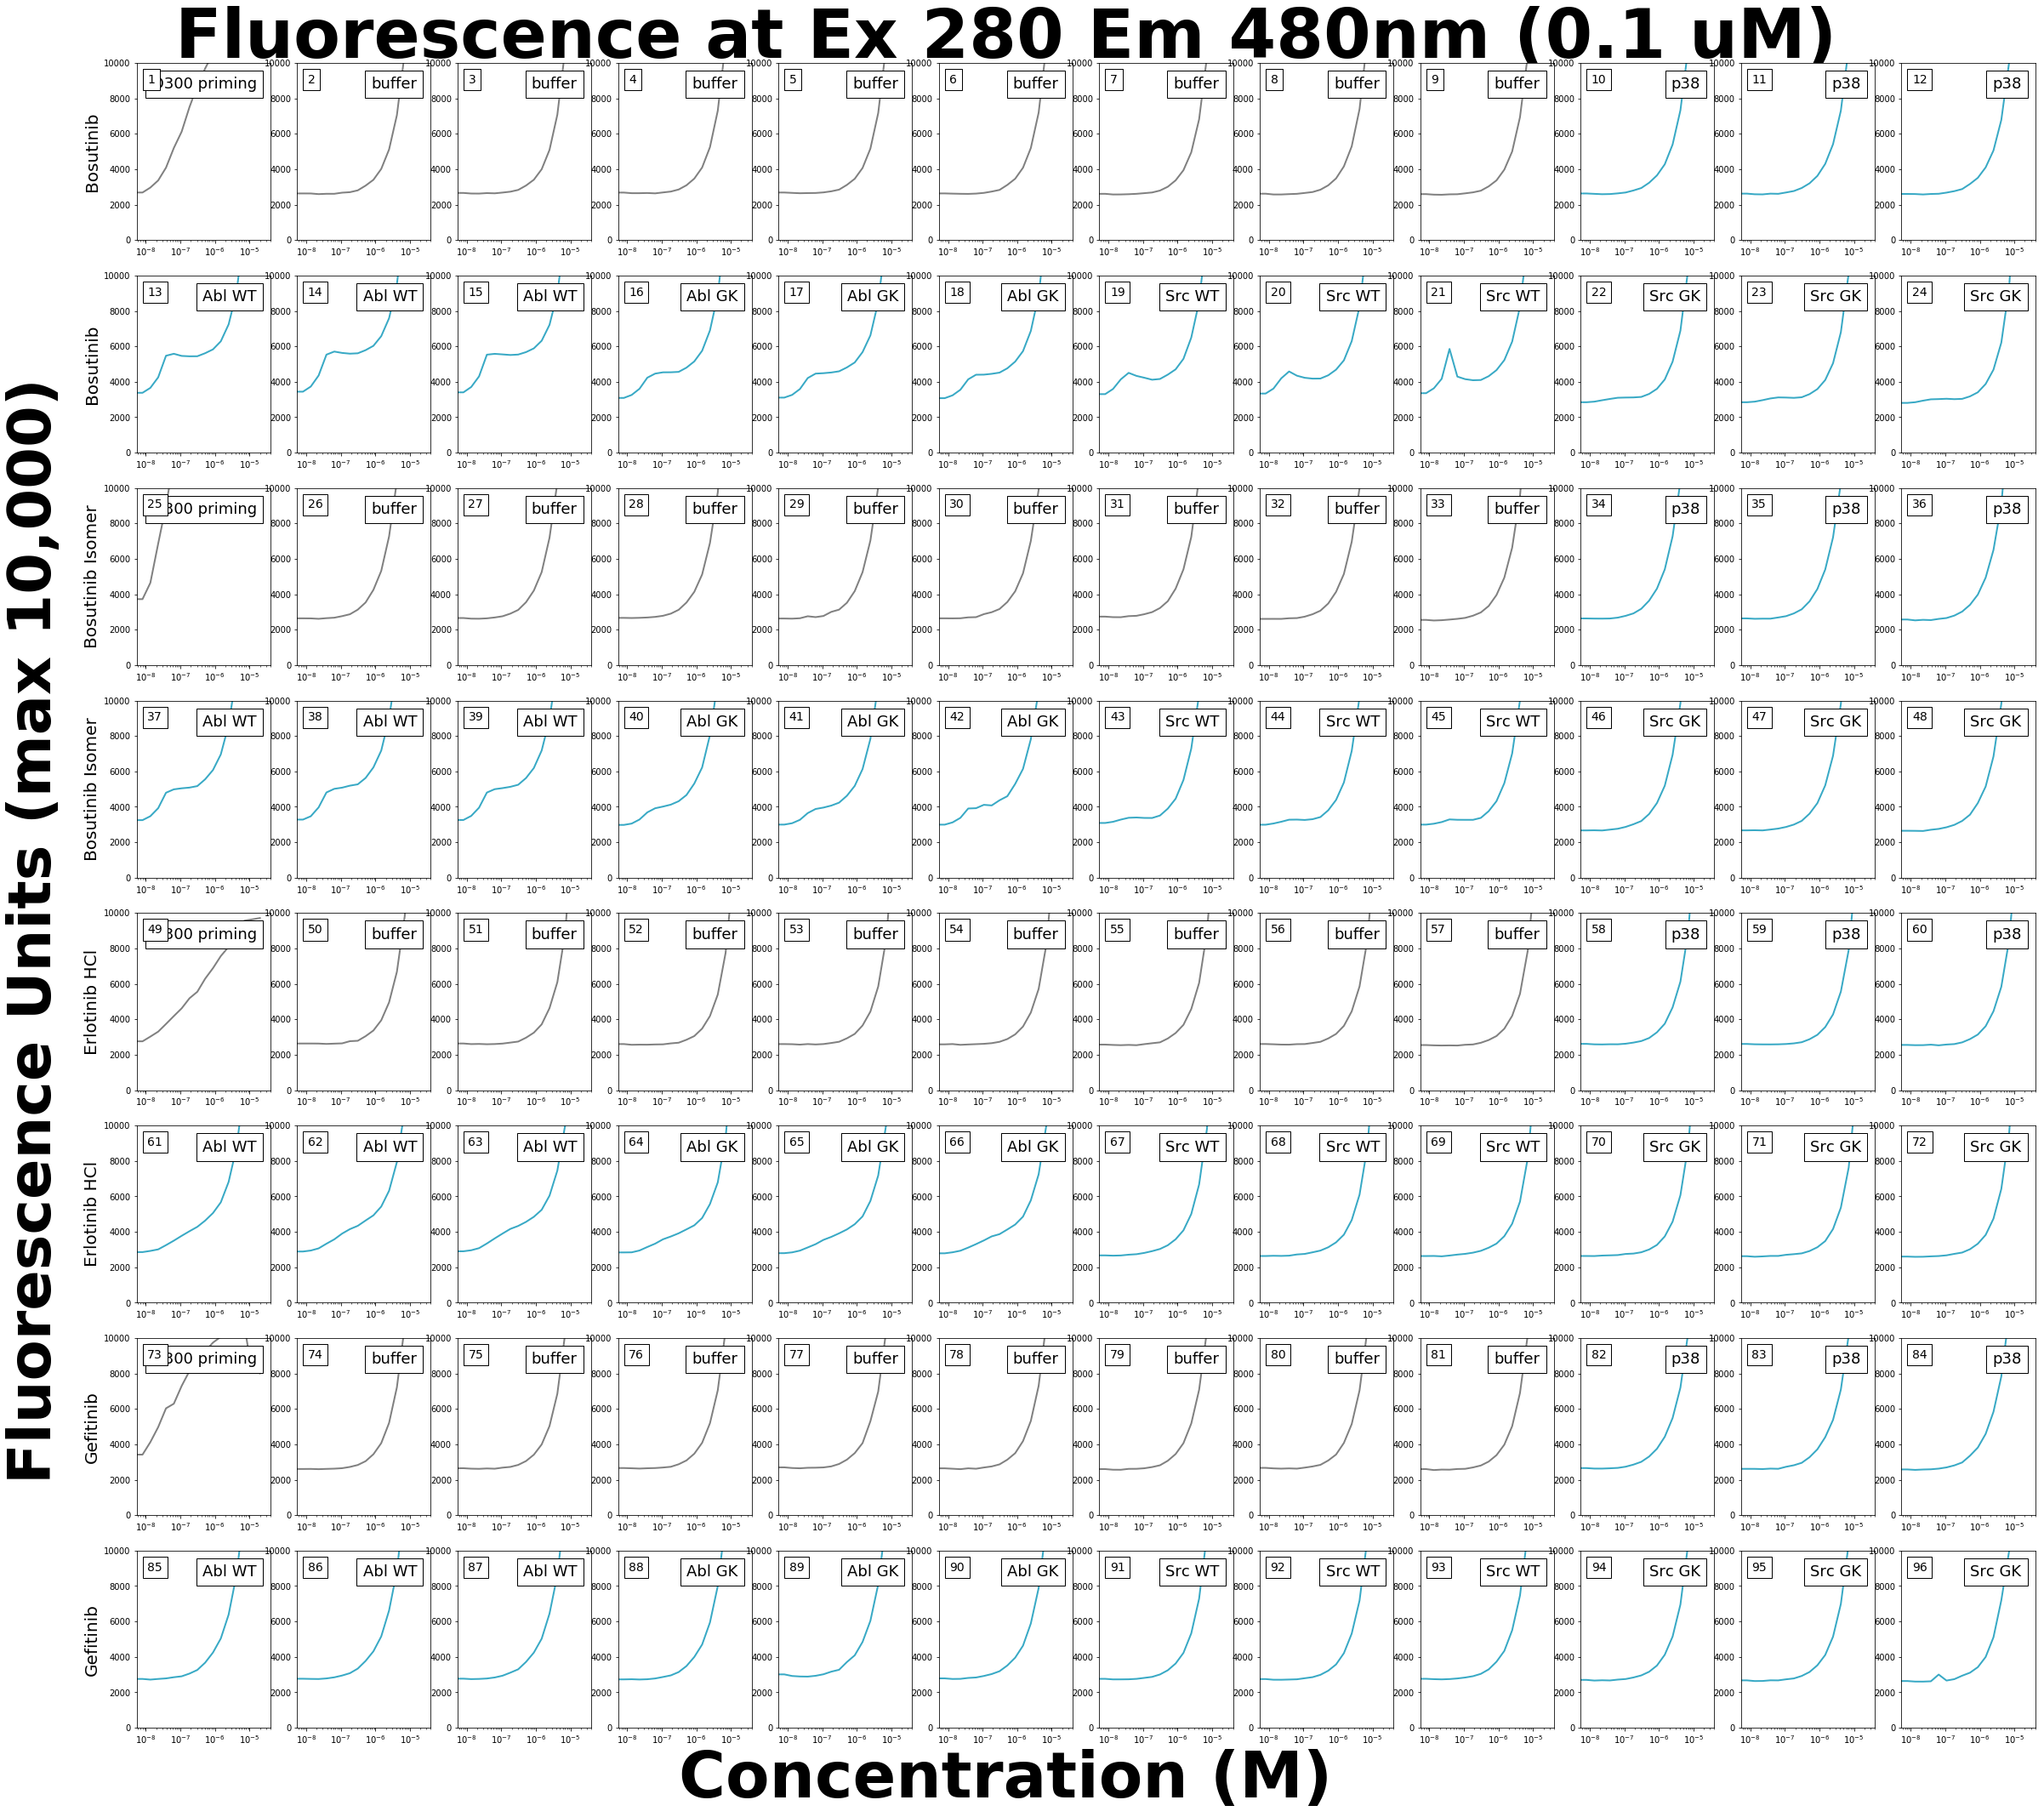

In [12]:
nrows = 8
ncols = 12
index = 0
fig, axes = plt.subplots(nrows, ncols, figsize=[40,36])

title = 'Fluorescence at Ex 280 Em 480nm (0.1 uM)'

x_values = concentrations

current_palette = sns.color_palette("husl", 10)
dilution_protein_color = current_palette[6]

for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            if plate_layout[plate_layout.well == well].name.any() in ['buffer', 'D300 priming']:
                 color='0.5'
            else:
                color=dilution_protein_color
            plt.semilogx(x_values, data_20190308[row_index,col_index,:], c=color, linewidth=2);

        plt.xlim(0,4e-5)
        plt.ylim(0,10000)
        plt.tick_params(axis='both', which='major', labelsize=10)

        # label subplots with contents of wells and index # 
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            anchored_text = AnchoredText('%s' % list(plate_layout[plate_layout.well == well].name)[0].split('_')[0], loc=1, prop=dict(size=18))
            ax.add_artist(anchored_text)
        if index == 89:
            plt.xlabel('Concentration (M)', fontsize=75, fontweight='bold')
        if index == 5:
            plt.title(title, loc='center', fontsize=80, fontweight='bold')
        if index == 85:
            axis = plt.gca()
            plt.ylabel('Fluorescence Units (max 10,000)', fontsize=70, fontweight='bold')
            axis.yaxis.set_label_coords(-1.75,4.5)

                
        # ligand labels
        if index == 12 or index == 0:
            plt.ylabel('Bosutinib', fontsize=20)
        if index == 24 or index == 36:
            plt.ylabel('Bosutinib Isomer', fontsize=20)
        if index == 48 or index == 60:
            plt.ylabel('Erlotinib HCl', fontsize=20)
        if index == 72 or index == 84:
            plt.ylabel('Gefitinib', fontsize=20)

        index += 1
        anchored_text2 = AnchoredText('%s' % (index),  loc='upper left', prop=dict(size=14))
        ax.add_artist(anchored_text2)

fig.savefig('20190308_dilution_single_well_single_wv_10k_max_log_y.pdf', bbox_inches='tight', dpi=300)

## Plot single wv absorbance at 280 nm across concentrations

In [4]:
# need to associate reads with correct well

nrows = 8
ncols = 12
index = 0

label = 'abs_280'
    
title = 'Absorbance Reads'

data_abs = np.zeros([nrows, ncols, nreads], np.float64) 
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        measurements_abs = [(reads[i][label][well]) for i in range(nreads)]
        for i in range(nreads):
            measurements_abs = [x if x != 'OVER' else 0 for x in measurements_abs]
            measurements_abs = [float(i) for i in measurements_abs]
        data_abs[row_index,col_index,:] = np.array(measurements_abs)
        print(well)
        print(data_abs[row_index,col_index,:])

A1
[1.6269 1.6276 1.6285 1.6305 1.6303 1.6333 1.6356 1.64   1.6457 1.6475
 1.6521 1.655  1.661  1.6655 1.6704 1.678  1.6804]
A2
[1.6242 1.627  1.6306 1.6333 1.6341 1.6337 1.635  1.6341 1.636  1.6362
 1.6397 1.6399 1.6454 1.6503 1.6612 1.6794 1.7052]
A3
[1.6322 1.6363 1.6398 1.6404 1.6424 1.6438 1.644  1.6441 1.646  1.6476
 1.6487 1.6498 1.6554 1.6609 1.6719 1.6878 1.7124]
A4
[1.6402 1.6455 1.6479 1.6503 1.6519 1.6524 1.6536 1.6545 1.6567 1.6583
 1.6586 1.6619 1.6642 1.6702 1.6818 1.6984 1.7225]
A5
[1.6554 1.6592 1.663  1.6647 1.6669 1.6677 1.6687 1.6685 1.672  1.6718
 1.6746 1.6763 1.6809 1.6863 1.696  1.7125 1.7377]
A6
[1.6554 1.6603 1.6637 1.6661 1.6676 1.6675 1.6698 1.6687 1.6705 1.671
 1.6752 1.6748 1.6787 1.6847 1.697  1.7158 1.7435]
A7
[1.6557 1.6617 1.664  1.6657 1.6686 1.6693 1.6685 1.6694 1.6701 1.6703
 1.6717 1.6743 1.6771 1.6837 1.6937 1.7109 1.7386]
A8
[1.6508 1.6571 1.6603 1.6627 1.6647 1.666  1.6653 1.6649 1.6676 1.6658
 1.6694 1.6718 1.6743 1.6813 1.6943 1.713  1.7457]
A

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

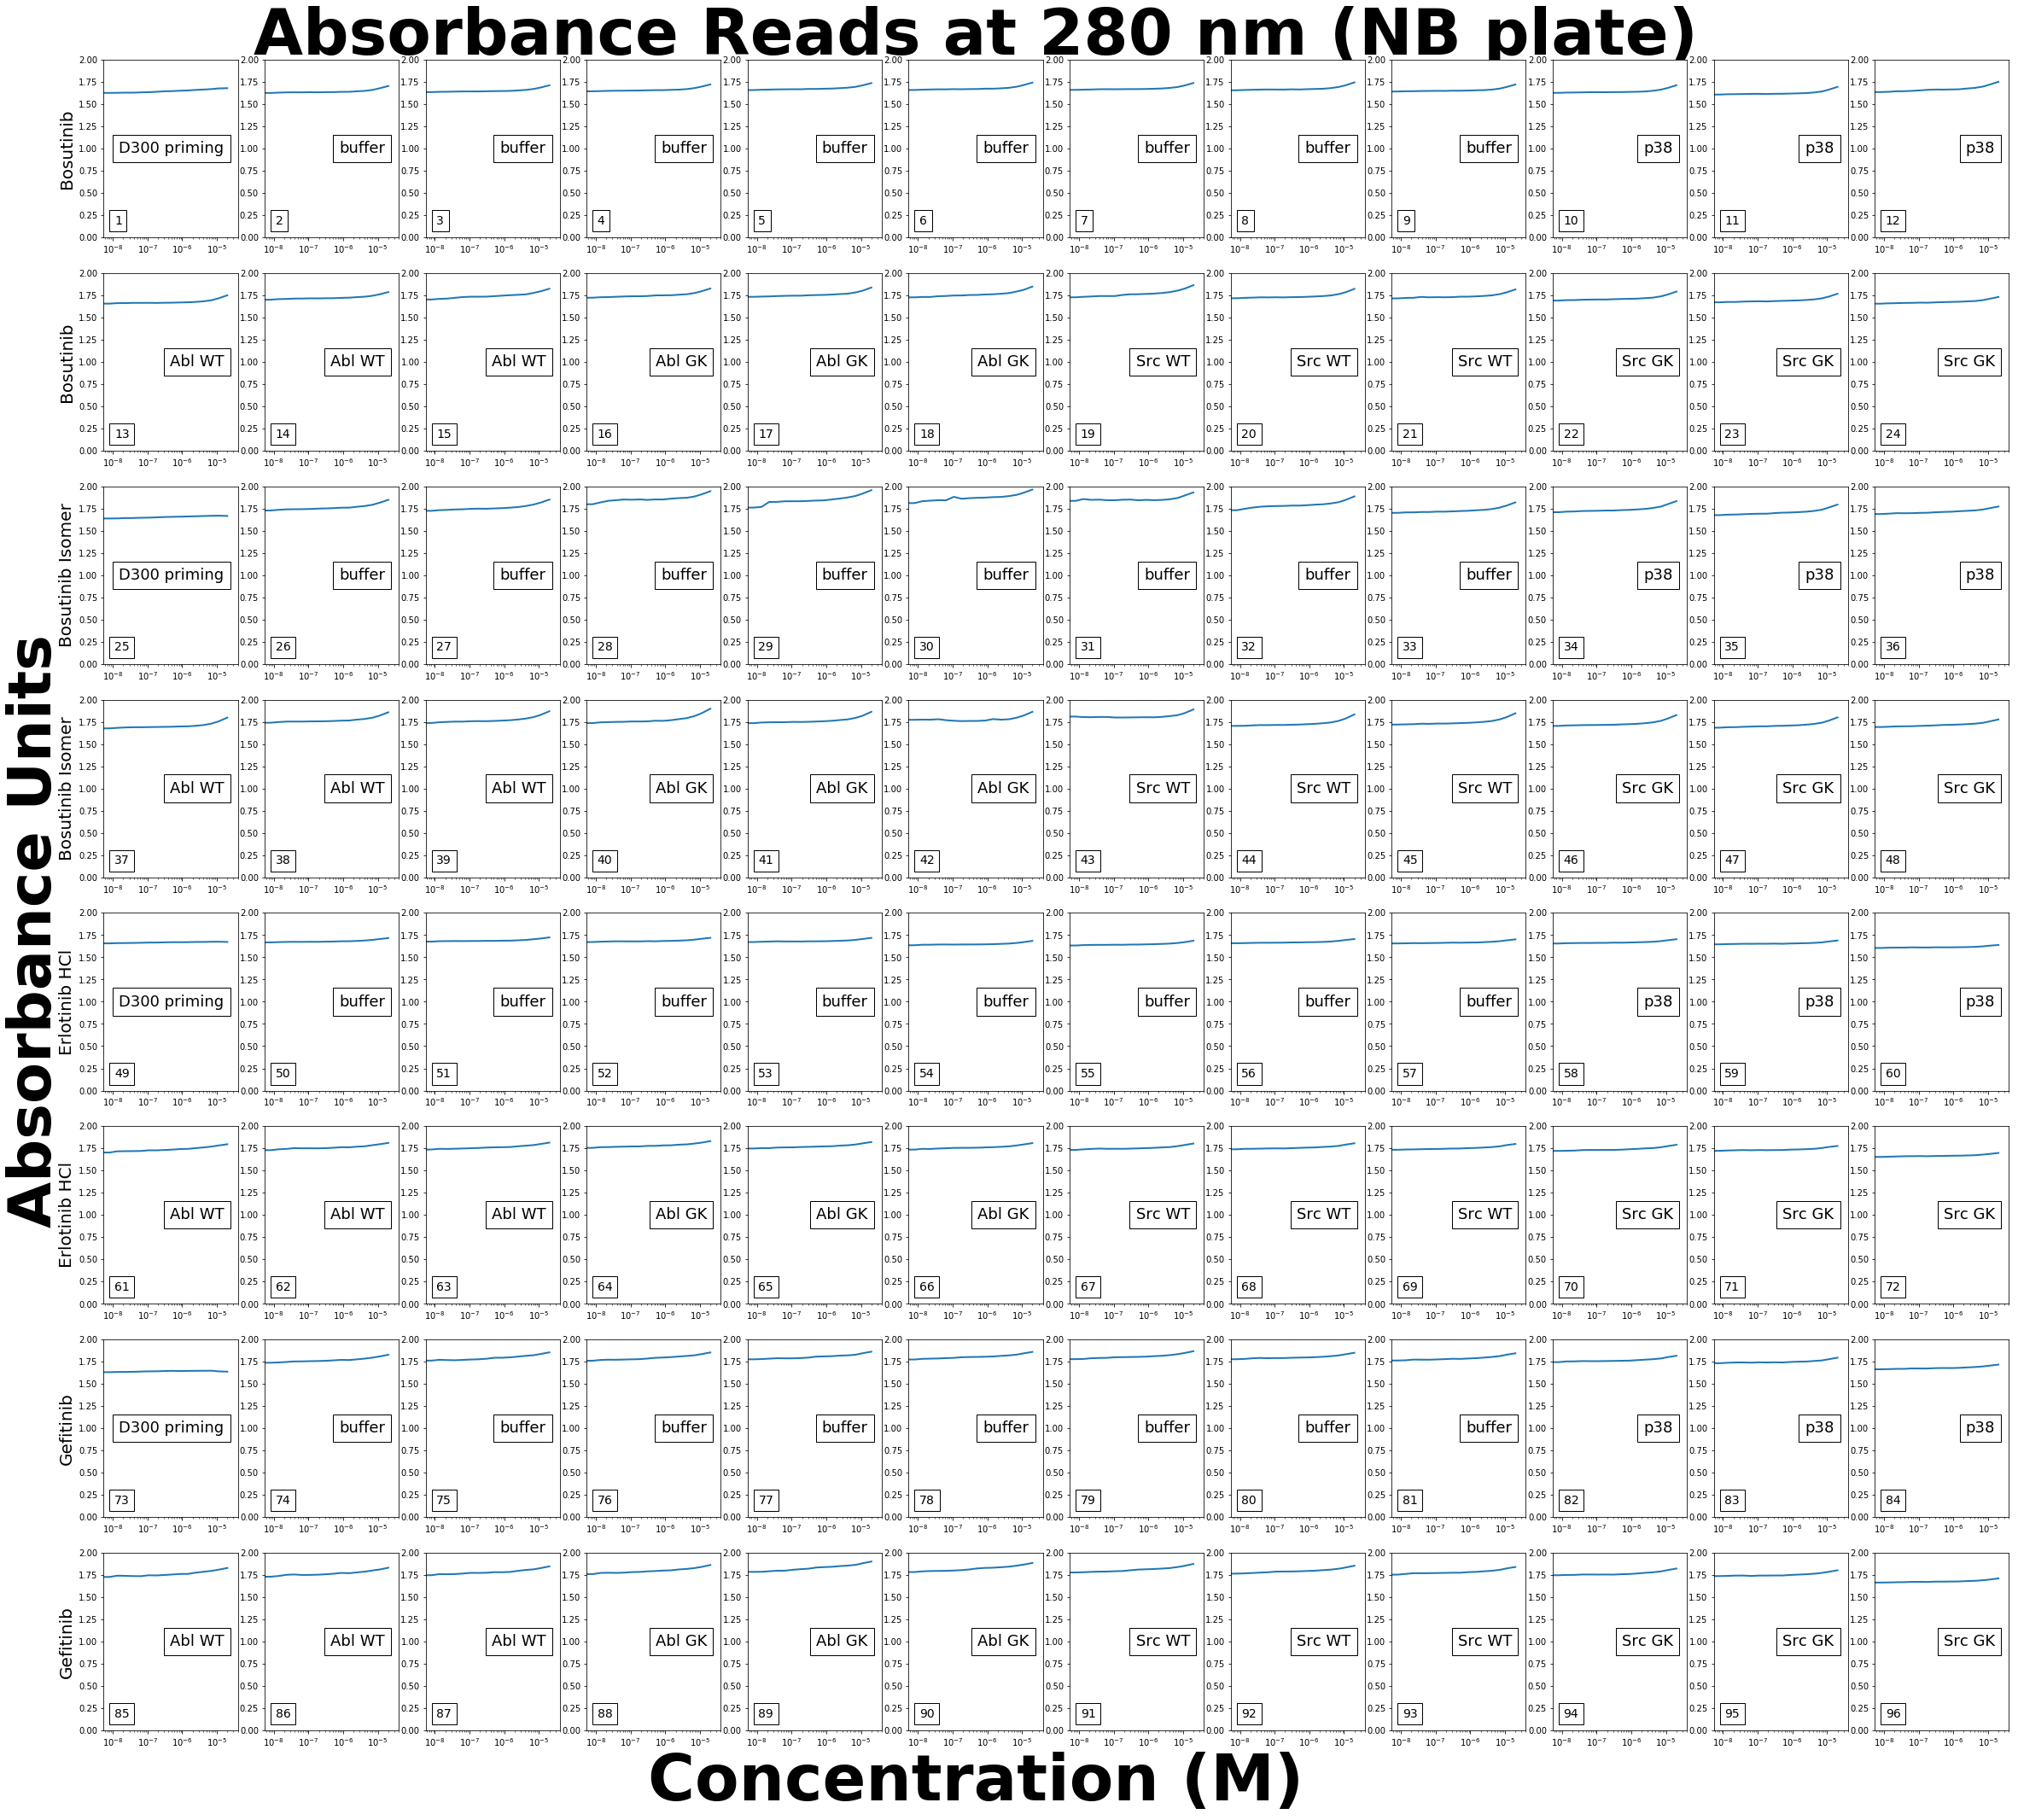

In [5]:
nrows = 8
ncols = 12
index = 0
fig, axes = plt.subplots(nrows, ncols, figsize=[40,36])

title = 'Absorbance Reads at 280 nm (NB plate)'

x_values = concentrations
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            plt.semilogx(x_values, data_abs[row_index,col_index,:], linewidth=2)

        plt.xlim(0,4e-5)
        plt.ylim(0, 2)
        plt.tick_params(axis='both', which='major', labelsize=10)

        # label subplots with contents of wells and index # 
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            anchored_text = AnchoredText('%s' % list(plate_layout[plate_layout.well == well].name)[0].split('_')[0], loc='center right', prop=dict(size=18))
            ax.add_artist(anchored_text)
        if index == 89:
             plt.xlabel('Concentration (M)', fontsize=75, fontweight='bold')
        if index == 5:
            plt.title(title, loc='center', fontsize=75, fontweight='bold')
        if index == 85:
            axis = plt.gca()
            plt.ylabel('Absorbance Units', fontsize=70, fontweight='bold')
            axis.yaxis.set_label_coords(-1.5,4.5)
                
        # ligand labels
        if index == 12 or index == 0:
            plt.ylabel('Bosutinib', fontsize=20)
        if index == 24 or index == 36:
            plt.ylabel('Bosutinib Isomer', fontsize=20)
        if index == 48 or index == 60:
            plt.ylabel('Erlotinib HCl', fontsize=20)
        if index == 72 or index == 84:
            plt.ylabel('Gefitinib', fontsize=20)

        index += 1
        anchored_text2 = AnchoredText('%s' % (index),  loc=3, prop=dict(size=14))
        ax.add_artist(anchored_text2)

            
fig.savefig('20190308_dilution_single_well_abs_280nm.pdf', bbox_inches='tight', dpi=300)

## Make overlapping plot of 0.5 uM and 0.1 uM single well 03/07/2019 and 03/08/2019

In [3]:
# load data from 20190307 experiment

filenames_20190307 = ['p38_Abl_WT_GK_Src_WT_GK_conc_0_20190307_111234.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_1_20190307_112351.xml',
             'p38_Abl_WT_GK_Src_WT_GKconc_2_20190307_113345.xml',
             'p38_Abl_WT_GK_Src_WT_GKconc_3_20190307_114336.xml',
             'p38_Abl_WT_GK_Src_WT_GKconc_4_20190307_115329.xml',
             'p38_Abl_WT_GK_Src_WT_GKconc_5_20190307_120322.xml',
             'p38_Abl_WT_GK_Src_WT_GKconc_6_20190307_121315.xml',
             'p38_Abl_WT_GK_Src_WT_GKconc_7_20190307_122657.xml',
             'p38_Abl_WT_GK_Src_WT_GKconc_8_20190307_123649.xml',
             'p38_Abl_WT_GK_Src_WT_GKconc_9_20190307_124642.xml',
             'p38_Abl_WT_GK_Src_WT_GKconc_10_20190307_125635.xml',
             'p38_Abl_WT_GK_Src_WT_GKconc_11_20190307_130625.xml',
             'p38_Abl_WT_GK_Src_WT_GKconc_12_20190307_131618.xml',
             'p38_Abl_WT_GK_Src_WT_GKconc_13_20190307_132611.xml',
             'p38_Abl_WT_GK_Src_WT_GKconc_14_20190307_133612.xml',
             'p38_Abl_WT_GK_Src_WT_GKconc_15_20190307_134607.xml',
             'p38_Abl_WT_GK_Src_WT_GKconc_16_20190307_135607.xml']

datapath_20190307 = 'infinite_results/20190307_files'

reads_20190307 = list()
nreads_20190307 = len(filenames_20190307)
for read in range(nreads_20190307):
    read = platereader.read_icontrol_xml(os.path.join(datapath_20190307, filenames_20190307[read]))
    reads_20190307.append(read)

In [4]:
# need to associate reads from 20190307 with correct well
nrows = 8
ncols = 12
index = 0

title = 'Fluorescence Reads Ex 280 nm Em 480 nm'

label = 'ex280_em480_top_gain100'

data_20190307 = np.zeros([nrows, ncols, nreads_20190307], np.float64) 
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        measurements_20190307 = [(reads_20190307[i][label][well]) for i in range(nreads_20190307)]
        for i in range(nreads_20190307):
            measurements_20190307 = [x if x != 'OVER' else 0 for x in measurements_20190307]
            measurements_20190307 = [float(i) for i in measurements_20190307]
        data_20190307[row_index,col_index,:] = np.array(measurements_20190307)
        print(well)
        print(data_20190307[row_index,col_index,:])

A1
[2532. 2594. 2701. 2868. 3102. 3548. 3851. 4548. 5246. 5901. 6755. 7842.
 7689. 8300. 8922. 9304. 9142.]
A2
[ 2617.  2663.  2611.  2601.  2556.  2611.  2650.  2662.  2833.  3042.
  3366.  3965.  4994.  6996. 10600. 17615. 31184.]
A3
[ 2664.  2635.  2614.  2622.  2576.  2643.  2687.  2717.  2849.  3081.
  3399.  4050.  5041.  7128. 10752. 17713. 31856.]
A4
[ 2648.  2663.  2656.  2630.  2605.  2656.  2684.  2743.  2886.  3101.
  3474.  4135.  5196.  7397. 11321. 18657. 32896.]
A5
[ 2651.  2640.  2636.  2619.  2619.  2667.  2675.  2766.  2909.  3122.
  3489.  4177.  5227.  7359. 11191. 18810. 32553.]
A6
[ 2643.  2664.  2619.  2628.  2610.  2648.  2690.  2702.  2875.  3124.
  3494.  4076.  5161.  7140. 10879. 17918. 31589.]
A7
[ 2576.  2585.  2581.  2567.  2553.  2585.  2607.  2661.  2818.  2987.
  3340.  3928.  4850.  6787. 10226. 16787. 29130.]
A8
[ 2606.  2615.  2577.  2579.  2569.  2600.  2634.  2691.  2825.  3055.
  3406.  4025.  5058.  7042. 10706. 17539. 30913.]
A9
[ 2599.  2594.

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Applications/miniconda3/e

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Applications/miniconda3/e

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Applications/miniconda3/e

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Applications/miniconda3/e

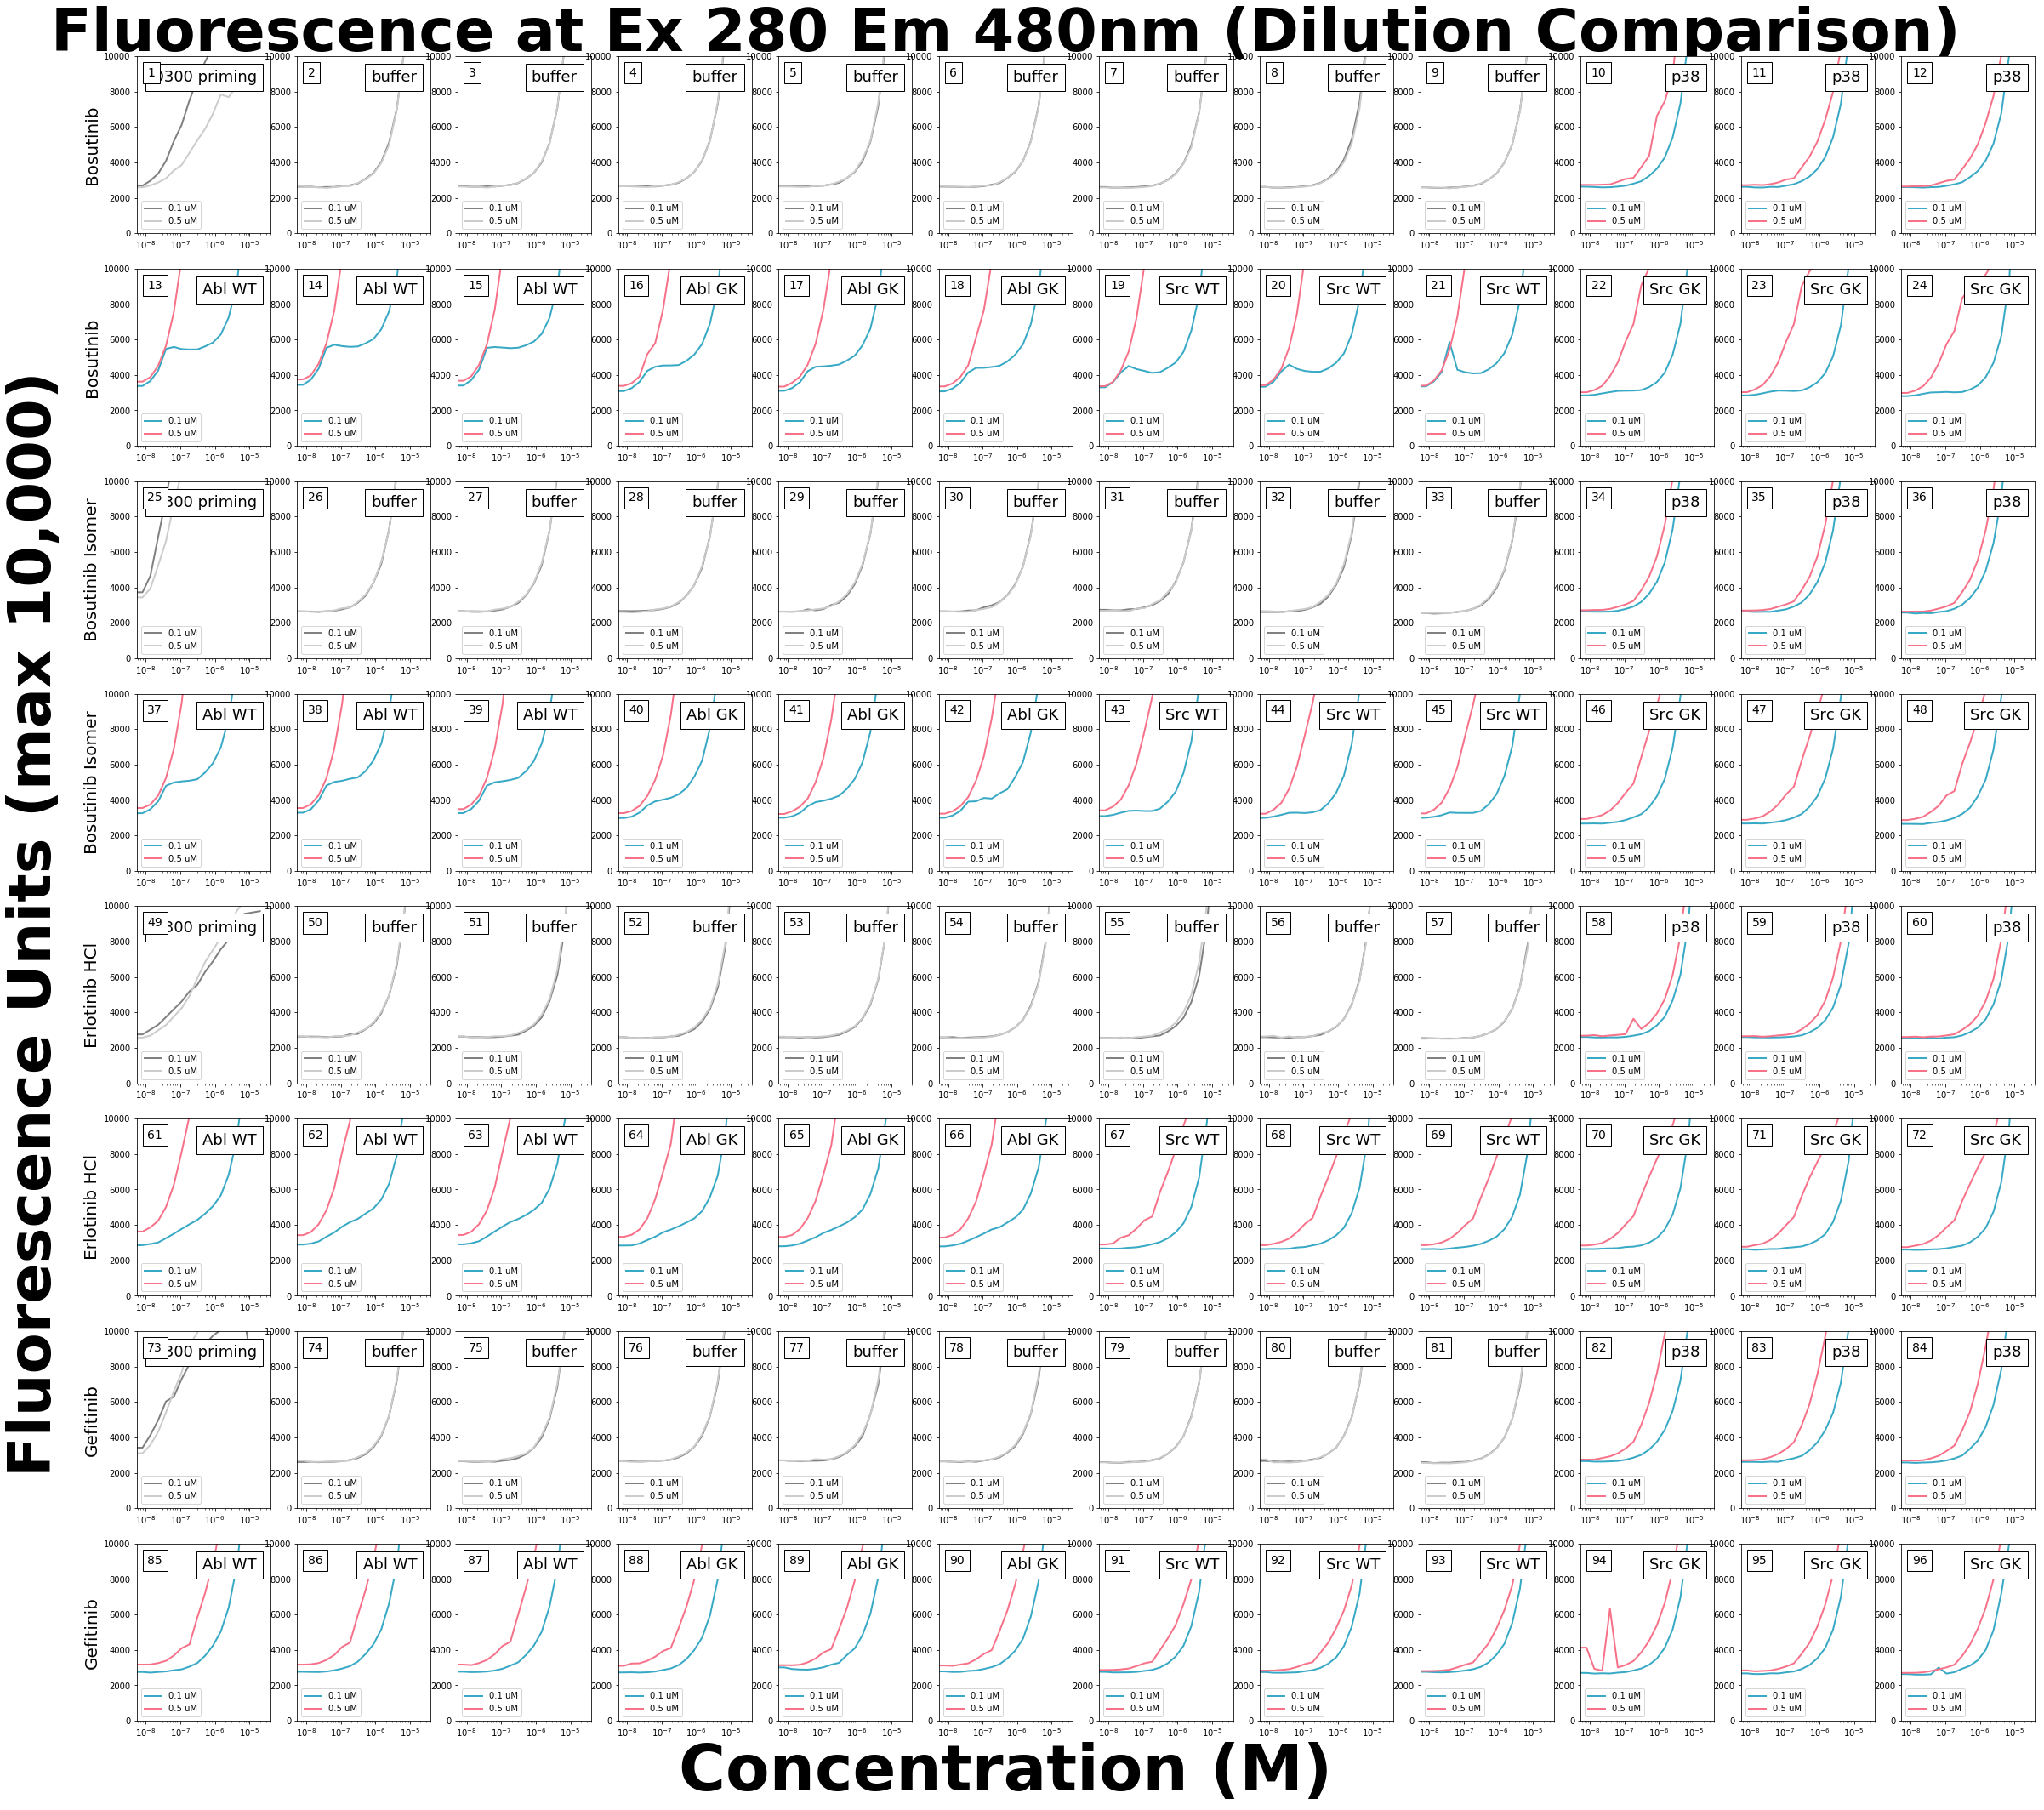

In [14]:
nrows = 8
ncols = 12
index = 0
fig, axes = plt.subplots(nrows, ncols, figsize=[40,36])

title = 'Fluorescence at Ex 280 Em 480nm (Dilution Comparison)'

x_values = concentrations

current_palette = sns.color_palette("husl", 10)
dilution_protein_color = current_palette[6]
normal_protein_color = current_palette[0]

for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            if plate_layout[plate_layout.well == well].name.any() in ['buffer', 'D300 priming']:
                 color='0.5'
            else:
                color=dilution_protein_color
            plt.semilogx(x_values, data_20190308[row_index,col_index,:], c=color, linewidth=2, label='0.1 uM');

        plt.xlim(0,4e-5)
        plt.ylim(0,10000)
        plt.tick_params(axis='both', which='major', labelsize=10)
        plt.legend(loc='lower left')

        # label subplots with contents of wells and index # 
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            anchored_text = AnchoredText('%s' % list(plate_layout[plate_layout.well == well].name)[0].split('_')[0], loc=1, prop=dict(size=18))
            ax.add_artist(anchored_text)
        if index == 89:
            plt.xlabel('Concentration (M)', fontsize=75, fontweight='bold')
        if index == 5:
            plt.title(title, loc='center', fontsize=70, fontweight='bold')
        if index == 85:
            axis = plt.gca()
            plt.ylabel('Fluorescence Units (max 10,000)', fontsize=70, fontweight='bold')
            axis.yaxis.set_label_coords(-1.75,4.5)

                
        # ligand labels
        if index == 12 or index == 0:
            plt.ylabel('Bosutinib', fontsize=20)
        if index == 24 or index == 36:
            plt.ylabel('Bosutinib Isomer', fontsize=20)
        if index == 48 or index == 60:
            plt.ylabel('Erlotinib HCl', fontsize=20)
        if index == 72 or index == 84:
            plt.ylabel('Gefitinib', fontsize=20)

        index += 1
        anchored_text2 = AnchoredText('%s' % (index),  loc='upper left', prop=dict(size=14))
        ax.add_artist(anchored_text2)
        
index = 0
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            if plate_layout[plate_layout.well == well].name.any() in ['buffer', 'D300 priming']:
                 color='0.8'
            else:
                color=normal_protein_color
            plt.semilogx(x_values, data_20190307[row_index,col_index,:], c=color, linewidth=2, label='0.5 uM');    
            plt.legend(loc='lower left')
        
        index += 1

fig.savefig('20190308_single_well_dilution_comparison_10k_max_log_y.pdf', bbox_inches='tight', dpi=300)

## Normalize data for better comparison

### normalization equation we will use: normalized_flu = [(flu_in_well_i) - (min_flu)] / [(max_flu - min_flu)]

In [6]:
# get min and max flu for each well then normalize data points (03/08/2019 data)

nrows = 8
ncols = 12

min_flu_20190308 = np.zeros([nrows, ncols], np.float64)
max_flu_20190308 = np.zeros([nrows, ncols], np.float64)
data_norm_20190308 = np.zeros([nrows, ncols, nreads], np.float64)

for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        measurements = [(reads[i][label][well]) for i in range(nreads)]
        for i in range(nreads):
            measurements = [x if x != 'OVER' else 0 for x in measurements]
            measurements = [float(i) for i in measurements]
            
        max_flu_20190308[row_index,col_index] = max(measurements)
        min_flu_20190308[row_index,col_index] = min(measurements)
        
        data_norm_20190308[row_index,col_index,:] = np.array([((i-min_flu_20190308[row_index,col_index])/(max_flu_20190308[row_index,col_index]-min_flu_20190308[row_index,col_index])) for i in measurements])
        
        print(well)
        print(data_norm_20190308[row_index,col_index])
        

A1
[0.         0.0113152  0.03293808 0.06417112 0.1200496  0.20615361
 0.27776486 0.38541424 0.47694335 0.5542122  0.62008835 0.65209641
 0.74688057 0.87964039 0.91079594 1.         0.99643494]
A2
[2.03797061e-03 1.35864707e-03 1.32289320e-03 0.00000000e+00
 6.79323537e-04 6.79323537e-04 2.93181737e-03 3.93292574e-03
 7.57982052e-03 1.71261039e-02 2.89248811e-02 5.08777575e-02
 9.01712610e-02 1.59533770e-01 2.85315885e-01 5.48750402e-01
 1.00000000e+00]
A3
[1.61180558e-03 1.28944446e-03 1.07453705e-04 0.00000000e+00
 9.67083348e-04 5.01450625e-04 2.04162040e-03 3.83251549e-03
 7.37848777e-03 1.62613274e-02 2.80095992e-02 4.92137971e-02
 8.83627637e-02 1.59497117e-01 2.91199542e-01 5.42175579e-01
 1.00000000e+00]
A4
[1.76519452e-03 1.55752457e-03 3.46116572e-04 3.46116572e-04
 6.92233144e-04 0.00000000e+00 1.79980617e-03 3.53038904e-03
 7.51072961e-03 1.58175273e-02 2.88315105e-02 5.04984079e-02
 9.02672020e-02 1.61636439e-01 2.93852970e-01 5.45998892e-01
 1.00000000e+00]
A5
[1.54276693

In [7]:
# get min and max flu for each well then normalize data points (03/07/2019 data)

nrows = 8
ncols = 12

min_flu_20190307 = np.zeros([nrows, ncols], np.float64)
max_flu_20190307 = np.zeros([nrows, ncols], np.float64)
data_norm_20190307 = np.zeros([nrows, ncols, nreads_20190307], np.float64)

for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        measurements_20190307 = [(reads_20190307[i][label][well]) for i in range(nreads_20190307)]
        for i in range(nreads_20190307):
            measurements_20190307 = [x if x != 'OVER' else 0 for x in measurements_20190307]
            measurements_20190307 = [float(i) for i in measurements_20190307]
            
        max_flu_20190307[row_index,col_index] = max(measurements_20190307)
        min_flu_20190307[row_index,col_index] = min(measurements_20190307)
        
        data_norm_20190307[row_index,col_index,:] = np.array([((i-min_flu_20190307[row_index,col_index])/(max_flu_20190307[row_index,col_index]-min_flu_20190307[row_index,col_index])) for i in measurements_20190307])
        
        print(well)
        print(data_norm_20190307[row_index,col_index])

A1
[0.         0.00915535 0.0249557  0.04961607 0.08417011 0.15002953
 0.19477259 0.2976964  0.40076787 0.49748966 0.62359716 0.78411105
 0.76151802 0.85174247 0.94359126 1.         0.97607797]
A2
[0.00213078 0.0037376  0.0019212  0.00157189 0.         0.0019212
 0.0032835  0.00370267 0.00967584 0.01697639 0.02829398 0.04921755
 0.08516138 0.15509292 0.28098365 0.52602347 1.        ]
A3
[0.00300546 0.00201503 0.00129781 0.00157104 0.         0.00228825
 0.00379098 0.00481557 0.00932377 0.01724727 0.02810792 0.05034153
 0.08418716 0.15546448 0.27923497 0.51697404 1.        ]
A4
[1.41956357e-03 1.91476016e-03 1.68366842e-03 8.25327655e-04
 0.00000000e+00 1.68366842e-03 2.60803539e-03 4.55580866e-03
 9.27668284e-03 1.63745007e-02 2.86883893e-02 5.05100525e-02
 8.55369582e-02 1.58198805e-01 2.87742234e-01 5.29926381e-01
 1.00000000e+00]
A5
[1.06901851e-03 7.01543395e-04 5.67916082e-04 0.00000000e+00
 0.00000000e+00 1.60352776e-03 1.87078239e-03 4.91080377e-03
 9.68798022e-03 1.68036347e-02

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Applications/miniconda3/e

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Applications/miniconda3/e

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Applications/miniconda3/e

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Applications/miniconda3/e

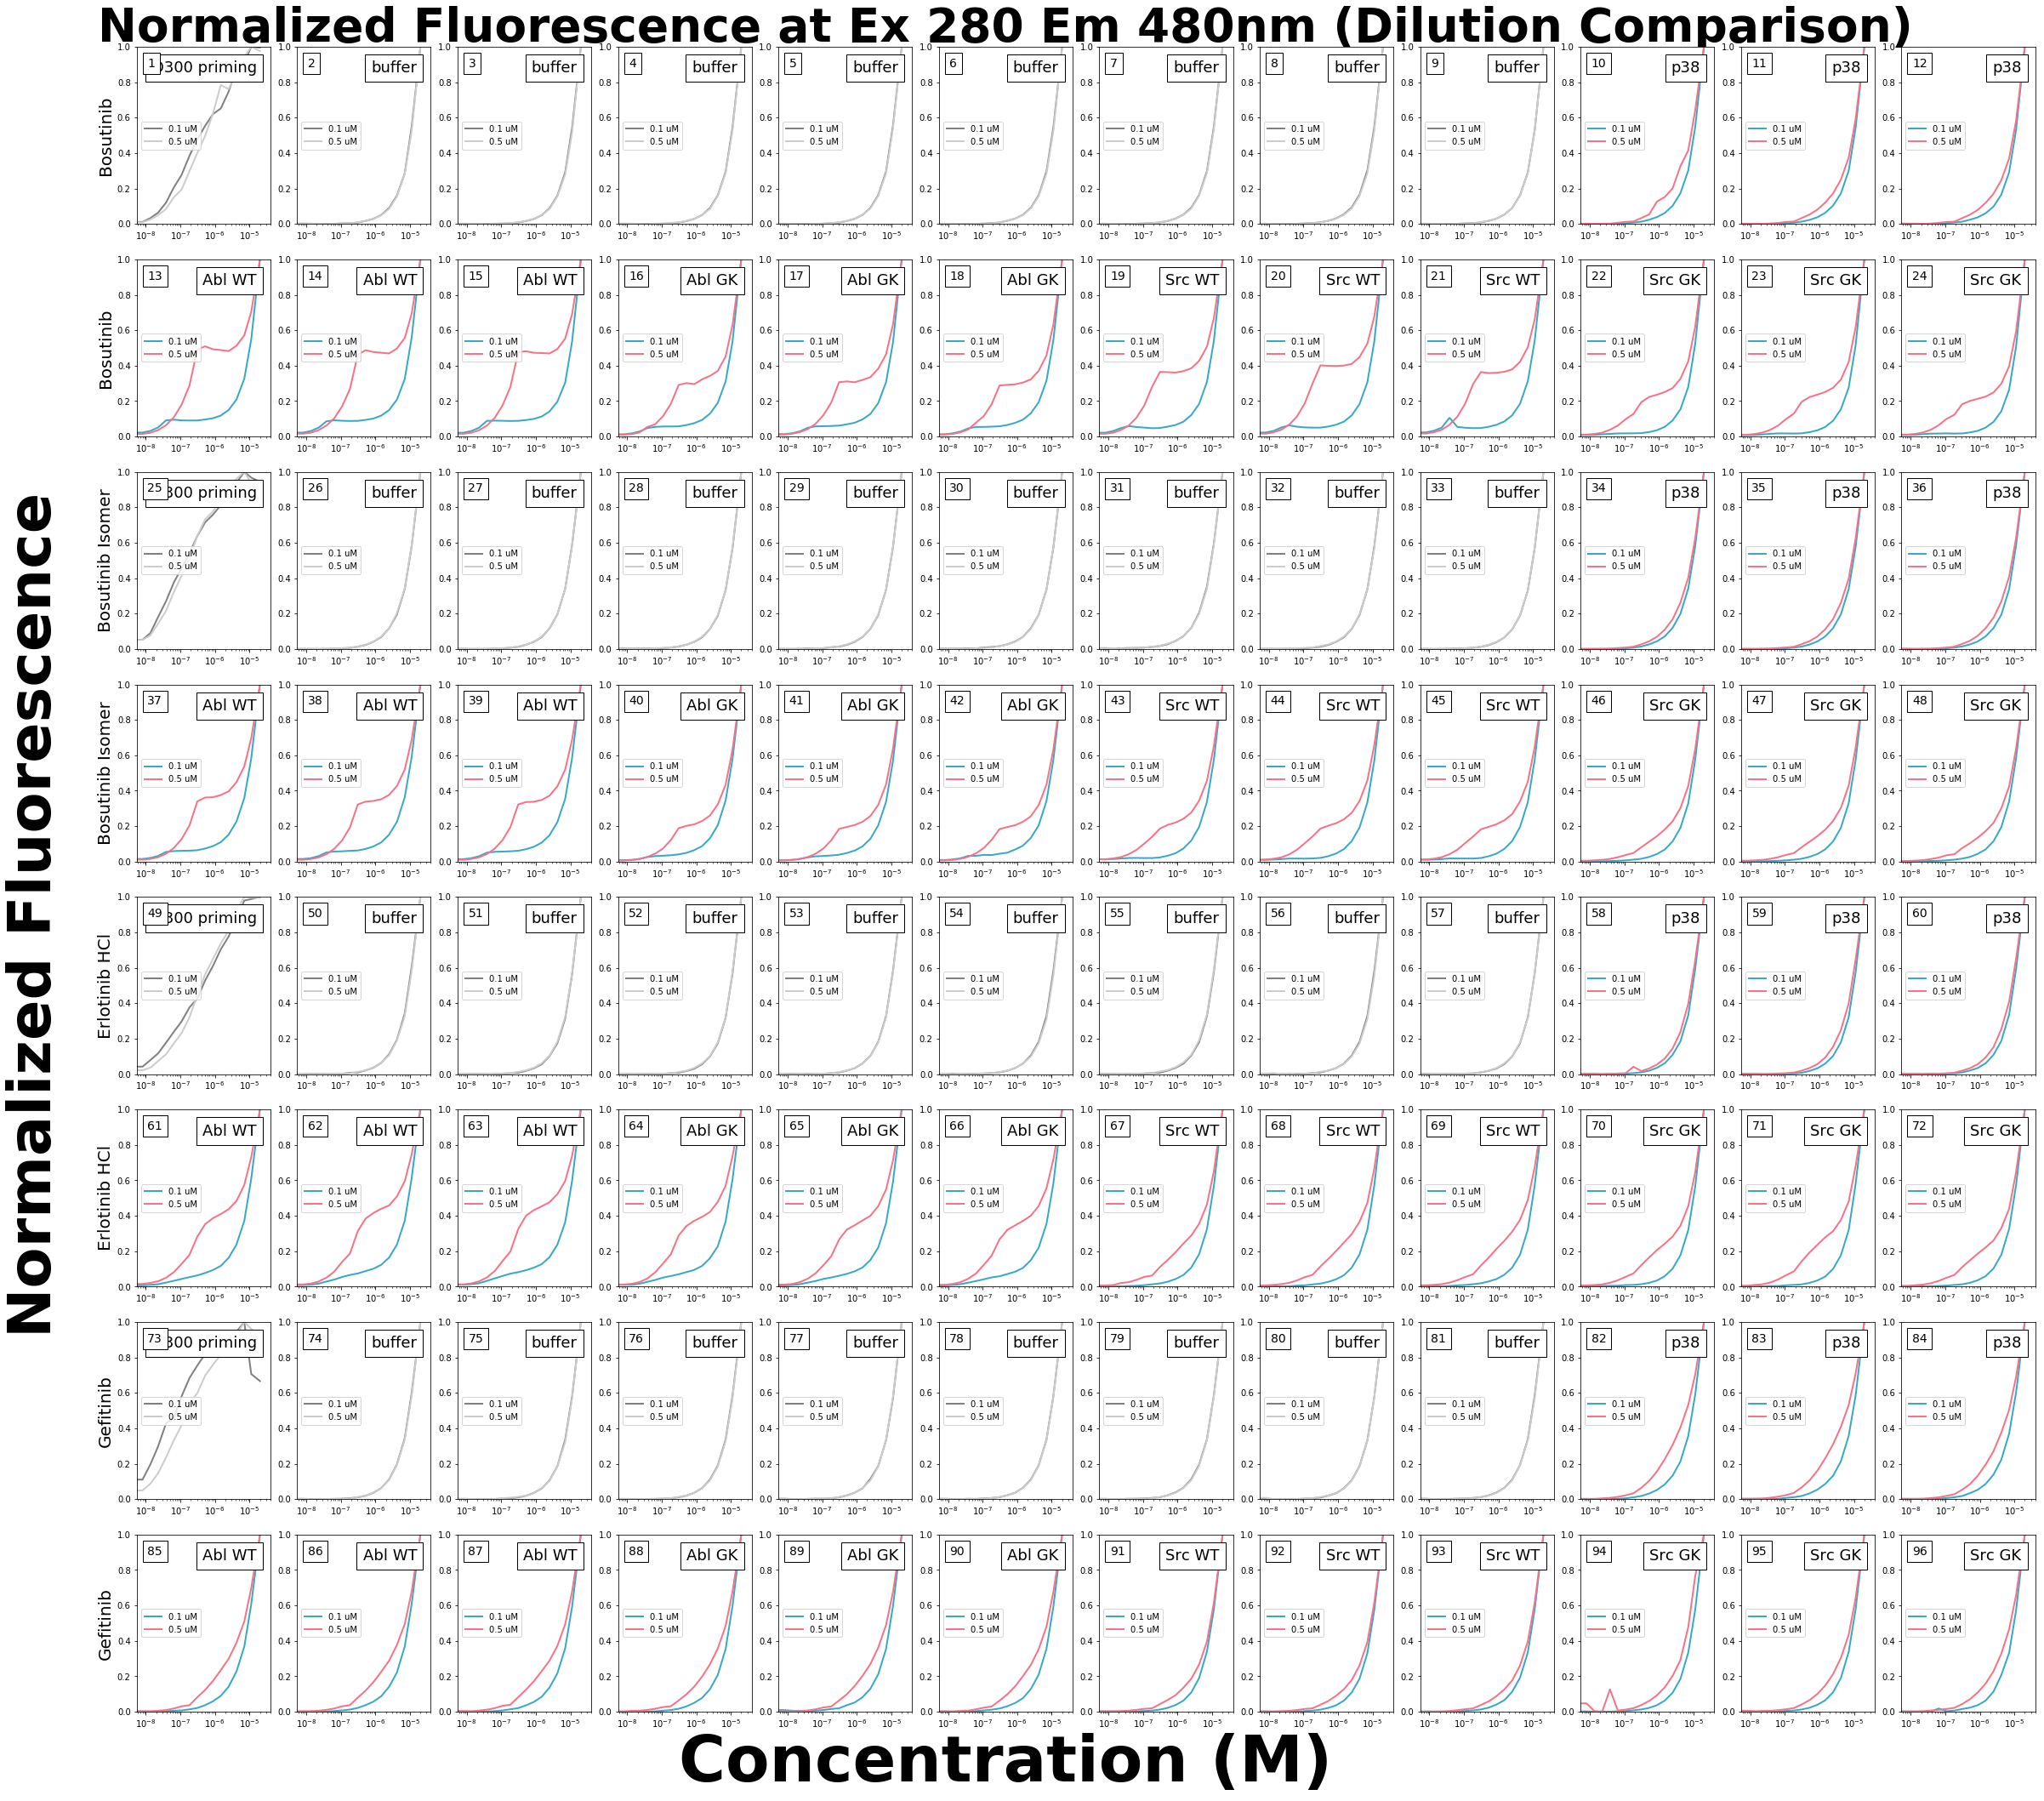

In [8]:
# plot normalized data

nrows = 8
ncols = 12
index = 0
fig, axes = plt.subplots(nrows, ncols, figsize=[40,36])

title = 'Normalized Fluorescence at Ex 280 Em 480nm (Dilution Comparison)'

x_values = concentrations

current_palette = sns.color_palette("husl", 10)
dilution_protein_color = current_palette[6]
normal_protein_color = current_palette[0]

for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            if plate_layout[plate_layout.well == well].name.any() in ['buffer', 'D300 priming']:
                 color='0.5'
            else:
                color=dilution_protein_color
            plt.semilogx(x_values, data_norm_20190308[row_index,col_index,:], c=color, linewidth=2, label='0.1 uM');
           

        plt.xlim(0,4e-5)
        plt.ylim(0,1)
        plt.tick_params(axis='both', which='major', labelsize=10)

        # label subplots with contents of wells and index # 
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            anchored_text = AnchoredText('%s' % list(plate_layout[plate_layout.well == well].name)[0].split('_')[0], loc=1, prop=dict(size=18))
            ax.add_artist(anchored_text)
        if index == 89:
            plt.xlabel('Concentration (M)', fontsize=75, fontweight='bold')
        if index == 5:
            plt.title(title, loc='center', fontsize=55, fontweight='bold')
        if index == 85:
            axis = plt.gca()
            plt.ylabel('Normalized Fluorescence', fontsize=70, fontweight='bold')
            axis.yaxis.set_label_coords(-1.75,4.5)

                
        # ligand labels
        if index == 12 or index == 0:
            plt.ylabel('Bosutinib', fontsize=20)
        if index == 24 or index == 36:
            plt.ylabel('Bosutinib Isomer', fontsize=20)
        if index == 48 or index == 60:
            plt.ylabel('Erlotinib HCl', fontsize=20)
        if index == 72 or index == 84:
            plt.ylabel('Gefitinib', fontsize=20)

        index += 1
        anchored_text2 = AnchoredText('%s' % (index),  loc='upper left', prop=dict(size=14))
        ax.add_artist(anchored_text2)

index = 0
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            if plate_layout[plate_layout.well == well].name.any() in ['buffer', 'D300 priming']:
                 color='0.8'
            else:
                color=normal_protein_color
            plt.semilogx(x_values, data_norm_20190307[row_index,col_index,:], c=color, linewidth=2, label='0.5 uM');    
            plt.legend(loc='center left')
        
        index += 1

fig.savefig('20190308_single_well_normalized_comparison_dilution_single_wv_log_y.pdf', bbox_inches='tight', dpi=300)